In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

json = pd.read_json ('https://pomber.github.io/covid19/timeseries.json')

In [2]:
def plot_country(country):
    df = pd.json_normalize(json[country])
    diff = df[['confirmed']].diff()[1:]
    df = df[1:]
    discharged = df.recovered+df.deaths
    hospitalized = df.confirmed - discharged
    
    print(df.tail(1).to_string(index=False))
    print('new',diff.tail(1).to_string(index=False))

    plt.figure(figsize=(8,4))
    plt.plot(df.confirmed,label='confirmed')
    plt.plot(df.recovered,c='g',label='recovered')
    plt.plot(df.deaths,c='r',label='deaths')
    plt.plot(discharged,dashes=[2,2,6, 2],c='y',label='discharged')
    plt.plot(hospitalized,dashes=[2,2,6, 2],c='b',label='hospitalized')
    plt.title(country)
    plt.xlabel('day')
    plt.legend(loc='upper left')
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.scatter(df.confirmed,diff.confirmed)
    model = np.poly1d(np.polyfit(df.confirmed, diff.confirmed, 3))
    xp = np.linspace(df.confirmed.min(), df.confirmed.max(), 100)
    plt.plot(xp, model(xp), c='r')
    plt.title(country)
    plt.xlabel('confirmed')
    plt.ylabel('new confirmed per day')
    plt.show()
    
    print('discharged: ',discharged.iloc[-1])
    print('deaths: ',df.deaths.iloc[-1])
    print('%: ',(df.deaths.iloc[-1]/discharged.iloc[-1]*100))

    plt.figure(figsize=(8,4))
    plt.scatter(df.recovered+df.deaths,df.deaths)
    plt.title(country)
    plt.xlabel('discharged')
    plt.ylabel('deaths')
    plt.show()


     date  confirmed  deaths  recovered
 2020-4-9       2423      32        940
new  confirmed
      54.0


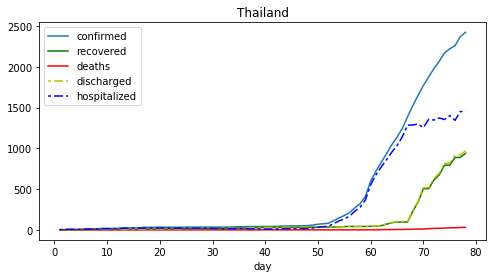

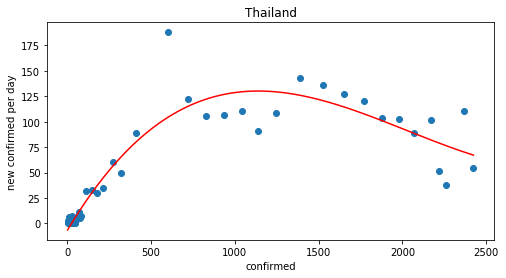

discharged:  972
deaths:  32
%:  3.292181069958848


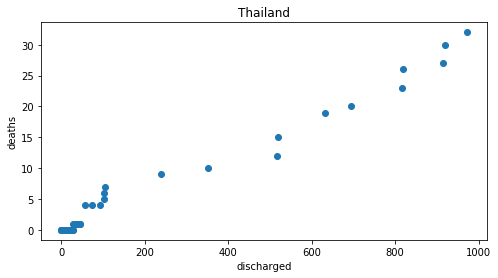

     date  confirmed  deaths  recovered
 2020-4-9     461437   16478      25410
new  confirmed
   32385.0


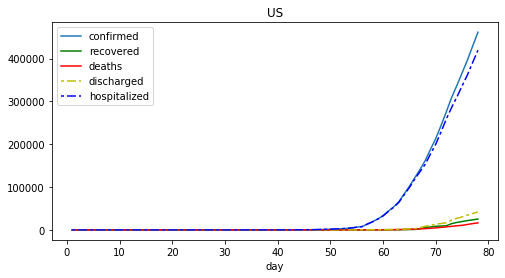

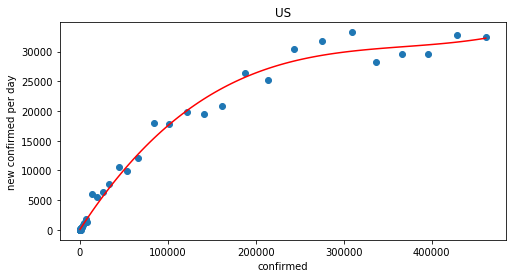

discharged:  41888
deaths:  16478
%:  39.338235294117645


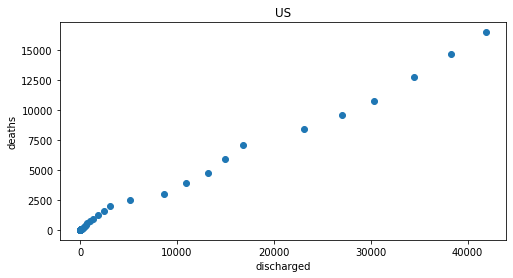

     date  confirmed  deaths  recovered
 2020-4-9      82883    3339      77679
new  confirmed
      74.0


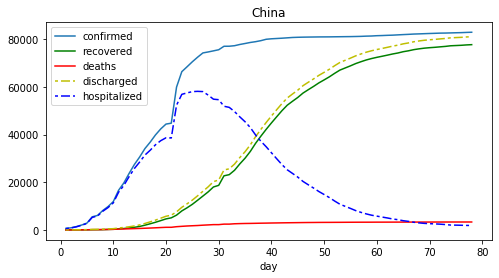

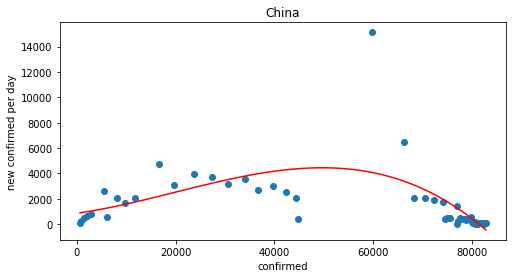

discharged:  81018
deaths:  3339
%:  4.121306376360809


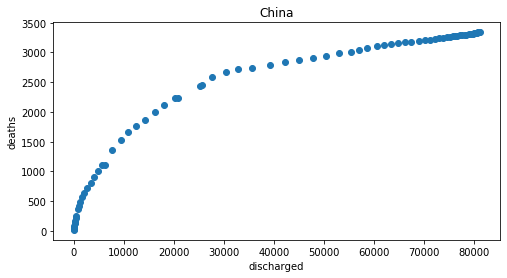

     date  confirmed  deaths  recovered
 2020-4-9     143626   18279      28470
new  confirmed
    4204.0


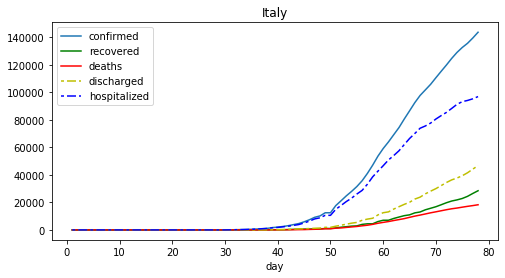

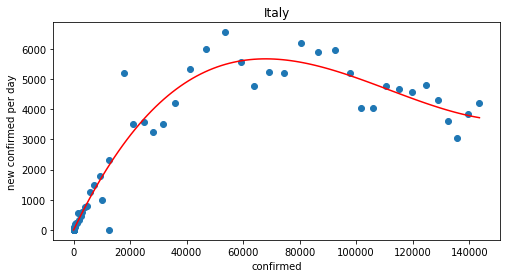

discharged:  46749
deaths:  18279
%:  39.100301610729645


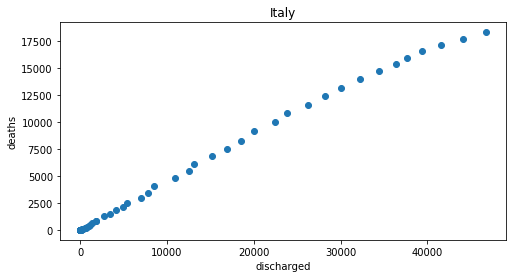

     date  confirmed  deaths  recovered
 2020-4-9     153222   15447      52165
new  confirmed
    5002.0


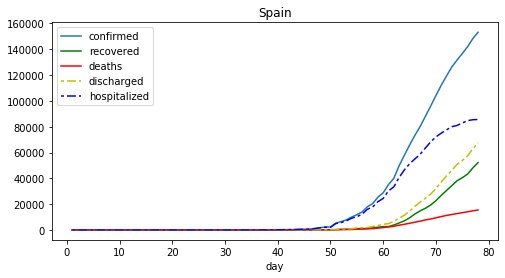

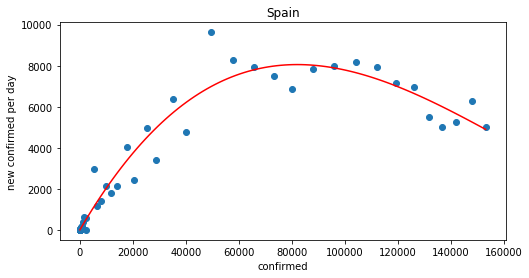

discharged:  67612
deaths:  15447
%:  22.846536117848903


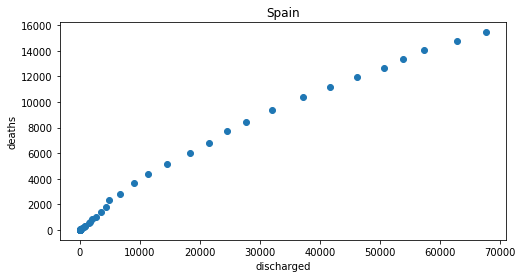

In [3]:
for c in ['Thailand','US','China','Italy','Spain']:
    plot_country(c)
